![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')# 
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
39847,id_11758,London,NaN,11768.0,NaN,4.0,"[['Nice', 'Just been redone'], ['12/17/2015', ...",/Restaurant_Review-g186338-d5828075-Reviews-Ch...,d5828075,1,4.5
8530,id_8530,Berlin,NaN,2983.0,NaN,6.0,"[[], []]",/Restaurant_Review-g187323-d5610167-Reviews-Ad...,d5610167,0,0.0
15479,id_3702,London,"['Asian', 'Vietnamese', 'Vegetarian Friendly',...",3709.0,$,198.0,"[['Just the job', 'Summer rolls and Avocado an...",/Restaurant_Review-g186338-d2104164-Reviews-Ba...,d2104164,1,4.0
48515,id_1692,Warsaw,NaN,1694.0,NaN,4.0,"[['Football and pizza :)'], ['07/21/2016']]",/Restaurant_Review-g274856-d10131145-Reviews-P...,d10131145,1,4.0
49382,id_12660,London,NaN,12670.0,NaN,NaN,"[['Fondue Lodge'], ['03/19/2017']]",/Restaurant_Review-g186338-d12121063-Reviews-F...,d12121063,1,4.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [15]:
data.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating'],
      dtype='object')

In [16]:
# для удобства изменим наименование столбцов
data.columns = ['restaurant_id', 'city', 'cuisine_style', 'ranking', 'price_range',
       'number_of_reviews', 'reviews', 'URL_TA', 'ID_TA', 'sample', 'rating']

In [17]:
data.head(3)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,URL_TA,ID_TA,sample,rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0


Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [18]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['number_of_reviews']).astype('uint8')

In [19]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [20]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
#data['number_of_reviews'].fillna(0, inplace=True)

In [21]:
# заполним NaN средним значением по городу
data.loc[data['number_of_reviews'].isnull(),['number_of_reviews']] = data.groupby(['city'])['number_of_reviews'].transform('mean')

# **cuisine_style**

In [22]:
#Отсутствующие значения можно отнести в группу неопределенных видов кухонь
data['cuisine_style'] = data['cuisine_style'].fillna('Unknown')
print(f"Количетсво отсутствующих значений {data['cuisine_style'].isna().sum()}")

Количетсво отсутствующих значений 0


# **price_range**

In [23]:
#для корректрой обработки дат, заменим nan значения пустыми списками
data['reviews'] = data['reviews'].fillna("[[], []]")
print(f"Количетсво отсутствующих значений {data['reviews'].isna().sum()}")

Количетсво отсутствующих значений 0


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [24]:
#проверяем типы и полноту данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
restaurant_id              50000 non-null object
city                       50000 non-null object
cuisine_style              50000 non-null object
ranking                    50000 non-null float64
price_range                32639 non-null object
number_of_reviews          50000 non-null float64
reviews                    50000 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
dtypes: float64(3), int64(1), object(7), uint8(1)
memory usage: 4.2+ MB


In [25]:
data.nunique(dropna=False)

restaurant_id              13094
city                          31
cuisine_style              10732
ranking                    12975
price_range                    4
number_of_reviews           1604
reviews                    41857
URL_TA                     49963
ID_TA                      49963
sample                         2
rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

# **City**

In [26]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
#data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [27]:
#список уникальных городов
city_lst = data.city.value_counts().index.to_list()
city_lst

['London',
 'Paris',
 'Madrid',
 'Barcelona',
 'Berlin',
 'Milan',
 'Rome',
 'Prague',
 'Lisbon',
 'Vienna',
 'Amsterdam',
 'Brussels',
 'Hamburg',
 'Munich',
 'Lyon',
 'Stockholm',
 'Budapest',
 'Warsaw',
 'Dublin',
 'Copenhagen',
 'Athens',
 'Edinburgh',
 'Zurich',
 'Oporto',
 'Geneva',
 'Krakow',
 'Oslo',
 'Helsinki',
 'Bratislava',
 'Luxembourg',
 'Ljubljana']

In [28]:
data = pd.get_dummies(data, columns=[ 'city',], dummy_na=True)
data

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,URL_TA,ID_TA,sample,rating,...,city_Oporto,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,0,0,0,0,0,0,0
49996,id_6340,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,0,1,0,0,0,0,0,0,0
49997,id_1649,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,0,0,1,0,0,0,0
49998,id_640,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,0,0,0,0,0,1,0,0


# **price_range**

In [29]:
# количество уникальных признаков
data['price_range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: price_range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [30]:
print("заменим значения на последовательные числа 0=no values, 1=low price, 2=Middle price, 3=high price")
def price_range(item):
    item = item.apply(lambda x: 1 if x=='$' else 3 if x=='$$$$' else 2 if x=='$$ - $$$' else 0)
    return item

data['price_range'] = price_range(data['price_range'])
data['price_range'].unique() #Check

заменим значения на последовательные числа 0=no values, 1=low price, 2=Middle price, 3=high price


array([2, 3, 1, 0])

In [31]:
#encoder = LabelEncoder()
#data['price_range'] = encoder.fit_transform(data['price_range'].dropna())

pp = data['price_range'].value_counts(sort=True)
print(f"самая популярная ценовая категория ресторанов {pp}")

самая популярная ценовая категория ресторанов 2    23041
0    17361
1     7816
3     1782
Name: price_range, dtype: int64


# **cuisine_style**

In [32]:
# приводим признак к "рабочему виду"
def clean_smb(smb):

    smb = smb.strip('[]') # Отбрасываем скобки.
    smb = smb.replace("\'",'') # Убираем надоедливые кавычки '.
    smb = smb.split(", ") # Разбиваем строку по названиям кухонь.
    return smb

# удалим лишние кавычки и заменим кириллицу на латинницу
data['cuisine_style'] = data['cuisine_style'].map(lambda x: x.replace('е', 'e').replace('а', 'a'))

# функция очистки от лишних символов
data['cuisine_style'] = data['cuisine_style'].apply(clean_smb)

In [33]:
# список уникальных кухонь
cuisine_lst = []
for i in range(len(data.cuisine_style)):
    for j in range(len(data.cuisine_style[i])):
        item = data.cuisine_style[i][j].lstrip(" '").rstrip("' ")
        if item not in cuisine_lst:
            cuisine_lst.append(item)

print("в датасете {} уникальных кухонь".format(len(cuisine_lst)-1))   # кухни с неопределенным видом "Unknown" не входят в отдельный вид

в датасете 125 уникальных кухонь


In [34]:
#сколько кухонь предлагает каждый ресторан в отдельный признак
cuisine_qty = [len(j) if j is not None else 1 for j in data.cuisine_style]
data['cuisine_amount'] = cuisine_qty

In [35]:
# создаем словарь с частотой каждого вида в датасете
cuisines = data.explode('cuisine_style') #промежуточный датафрейм
freq_cuisines = cuisines.cuisine_style.value_counts().to_dict()#запись в словарь

#max(freq_cuisines, key = str)

print("Наиболее часто представлена кухня {}".format(max(freq_cuisines, key=freq_cuisines.get)))

Наиболее часто представлена кухня Vegetarian Friendly


In [36]:
data.head(3)

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,URL_TA,ID_TA,sample,rating,...,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan,cuisine_amount
0,id_0,"[Bar, Pub]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,1,0,0,0,0,0,0,0,2
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,5
2,id_2,[Vegetarian Friendly],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,1


# **reviews**

In [37]:
import re
# разделим данные в столбце на два списка
data[['review_text','review_date']] = pd.DataFrame(data['reviews'].str.split("],",1).to_list())
data[['review_text']] = data['review_text'].apply(lambda x: x[2:])
data[['review_date']] = data['review_date'].apply(lambda x: x[2:-2])

In [38]:
data[['review_text', 'review_date' ]].sample()

,review_text,review_date
33622,"'Just ok', 'Delicious!'","'02/25/2017', '09/17/2017'"


In [39]:
# попробуем проанализировать текст отзывов

words = {'will come back':4,"WOW":4,"fantastic":4,"Fantastic":4,"delightful":3,"great":3,"Great":3,"Delightful":3,"yummi":3,"Yummi":3,"nice":2,"nice":2,'good':1, 'Good':1,"Average":0,"average":0,"bad":-1,'Bad':-1,"disgusting":-2,"avoid":-3,"Avoid":-3,"worst":-4,"Worst":-4}


def review_analysis_column(x,y):
    result = 0
    for word in y:
        if re.search(r'\b%s\b' % word, x) is not None:
            result = y[word]
    return result

data['review_analysis'] = data.review_text.apply(lambda x: review_analysis_column(x, words))
data['review_analysis'].value_counts()

 0    29833
 1     9766
 3     7185
 2     1395
 4      659
-1      647
-4      314
-3      182
-2       19
Name: review_analysis, dtype: int64

In [40]:
# разделим даты отзывов на два признака
data[['review_1','review_2']] = pd.DataFrame(data['review_date'].str.split(", ",1).to_list())

In [41]:
#заполним пропуски 
data[['review_2']] = data['review_2'].fillna('0')

In [42]:
# переведем даты в формат datetime
import datetime
from datetime import timedelta

def date_time(s):
    #"""функция для перевода в формат datetime"""
    date1 = re.search(r'\d{2}/\d{2}/\d{4}',s)
    if date1 is not None:
        return (datetime.datetime.strptime(date1.group(),'%m/%d/%Y').date())
    else:
        return None

In [43]:
#создадим столбец 'time_difference' - разница между отзывами
data[['review_1']] = data['review_1'].apply(date_time)
data[['review_2']] = data['review_2'].apply(date_time)
time_difference = abs(data['review_1'] - data['review_2'])
data['time_difference'] = time_difference.dropna().apply(lambda x: abs(np.timedelta64(x).astype(int)))
data[['time_difference']] = data['time_difference'].fillna(0)


In [44]:
data.loc[:1]

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,URL_TA,ID_TA,sample,rating,...,city_Warsaw,city_Zurich,city_nan,cuisine_amount,review_text,review_date,review_analysis,review_1,review_2,time_difference
0,id_0,"[Bar, Pub]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,2,,,0,None,None,0.000000e+00
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,5,"'Very good reviews!', 'Fine dining in Hakaniemi'","'12/05/2017', '10/29/2017'",1,2017-12-05,2017-10-29,3.196800e+12


# **ID_TA** 

In [45]:
#переведем столбец ID_TA в цифровой формат
data[['ID_TA']] = data['ID_TA'].dropna().apply(lambda x: int(x[1:]))
data[['ID_TA']] = data['ID_TA'].fillna(0)

# **Feature Engineering**

In [46]:
#Заменим наименования видов кухонь на значения словаря с их нормализованной частотой и запишем их в новый признак

data = data.explode('cuisine_style')


freq_cuisines = data.cuisine_style.value_counts(normalize=True).to_dict()


data['cuisine_code_freq'] = data['cuisine_style'].apply(lambda v: freq_cuisines[v],freq_cuisines.values())
data.loc[:1]    

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,URL_TA,ID_TA,sample,rating,...,city_Zurich,city_nan,cuisine_amount,review_text,review_date,review_analysis,review_1,review_2,time_difference,cuisine_code_freq
0,id_0,Bar,12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,10746918,0,0.0,...,0,0,2,,,0,None,None,0.000000e+00,0.031189
0,id_0,Pub,12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,10746918,0,0.0,...,0,0,2,,,0,None,None,0.000000e+00,0.023296
1,id_1,European,106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,6674944,0,0.0,...,0,0,5,"'Very good reviews!', 'Fine dining in Hakaniemi'","'12/05/2017', '10/29/2017'",1,2017-12-05,2017-10-29,3.196800e+12,0.095691
1,id_1,Scandinavian,106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,6674944,0,0.0,...,0,0,5,"'Very good reviews!', 'Fine dining in Hakaniemi'","'12/05/2017', '10/29/2017'",1,2017-12-05,2017-10-29,3.196800e+12,0.003421
1,id_1,Gluten Free Options,106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,6674944,0,0.0,...,0,0,5,"'Very good reviews!', 'Fine dining in Hakaniemi'","'12/05/2017', '10/29/2017'",1,2017-12-05,2017-10-29,3.196800e+12,0.039500
1,id_1,Vegetarian Friendly,106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,6674944,0,0.0,...,0,0,5,"'Very good reviews!', 'Fine dining in Hakaniemi'","'12/05/2017', '10/29/2017'",1,2017-12-05,2017-10-29,3.196800e+12,0.106814
1,id_1,Vegan Options,106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,6674944,0,0.0,...,0,0,5,"'Very good reviews!', 'Fine dining in Hakaniemi'","'12/05/2017', '10/29/2017'",1,2017-12-05,2017-10-29,3.196800e+12,0.043301


In [47]:
data.columns

Index(['restaurant_id', 'cuisine_style', 'ranking', 'price_range',
       'number_of_reviews', 'reviews', 'URL_TA', 'ID_TA', 'sample', 'rating',
       'Number_of_Reviews_isNAN', 'city_Amsterdam', 'city_Athens',
       'city_Barcelona', 'city_Berlin', 'city_Bratislava', 'city_Brussels',
       'city_Budapest', 'city_Copenhagen', 'city_Dublin', 'city_Edinburgh',
       'city_Geneva', 'city_Hamburg', 'city_Helsinki', 'city_Krakow',
       'city_Lisbon', 'city_Ljubljana', 'city_London', 'city_Luxembourg',
       'city_Lyon', 'city_Madrid', 'city_Milan', 'city_Munich', 'city_Oporto',
       'city_Oslo', 'city_Paris', 'city_Prague', 'city_Rome', 'city_Stockholm',
       'city_Vienna', 'city_Warsaw', 'city_Zurich', 'city_nan',
       'cuisine_amount', 'review_text', 'review_date', 'review_analysis',
       'review_1', 'review_2', 'time_difference', 'cuisine_code_freq'],
      dtype='object')

In [48]:
data = data.drop(columns=['restaurant_id', 'cuisine_style','reviews', 'URL_TA','review_text', 'review_date', 'review_1', 'review_2',])
data.head(3)

,ranking,price_range,number_of_reviews,ID_TA,sample,rating,Number_of_Reviews_isNAN,city_Amsterdam,city_Athens,city_Barcelona,...,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan,cuisine_amount,review_analysis,time_difference,cuisine_code_freq
0,12963.0,2,4.0,10746918,0,0.0,0,0,0,0,...,0,0,0,0,0,0,2,0,0.000000e+00,0.031189
0,12963.0,2,4.0,10746918,0,0.0,0,0,0,0,...,0,0,0,0,0,0,2,0,0.000000e+00,0.023296
1,106.0,2,97.0,6674944,0,0.0,0,0,0,0,...,0,0,0,0,0,0,5,1,3.196800e+12,0.095691


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131266 entries, 0 to 49999
Data columns (total 43 columns):
ranking                    131266 non-null float64
price_range                131266 non-null int64
number_of_reviews          131266 non-null float64
ID_TA                      131266 non-null int64
sample                     131266 non-null int64
rating                     131266 non-null float64
Number_of_Reviews_isNAN    131266 non-null uint8
city_Amsterdam             131266 non-null uint8
city_Athens                131266 non-null uint8
city_Barcelona             131266 non-null uint8
city_Berlin                131266 non-null uint8
city_Bratislava            131266 non-null uint8
city_Brussels              131266 non-null uint8
city_Budapest              131266 non-null uint8
city_Copenhagen            131266 non-null uint8
city_Dublin                131266 non-null uint8
city_Edinburgh             131266 non-null uint8
city_Geneva                131266 non-null uint8
ci

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

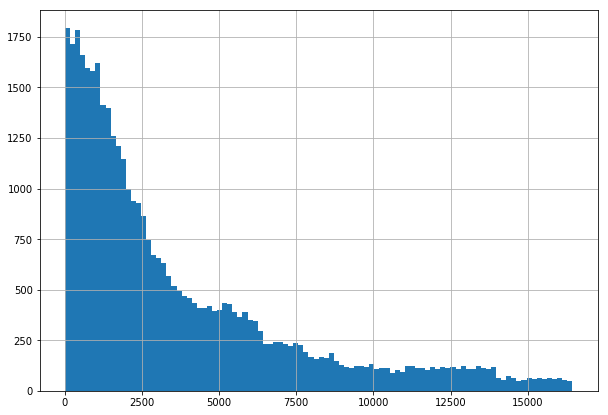

In [50]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

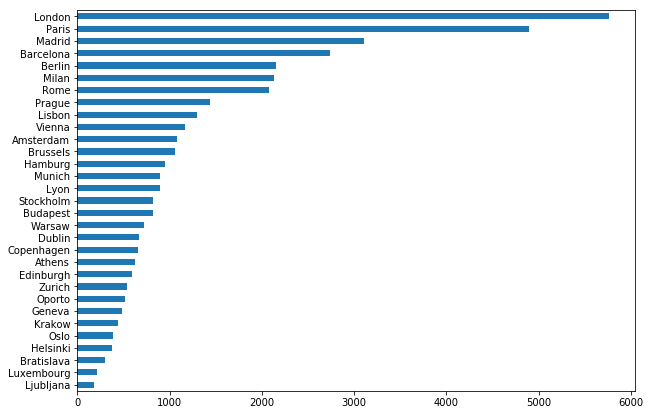

In [51]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

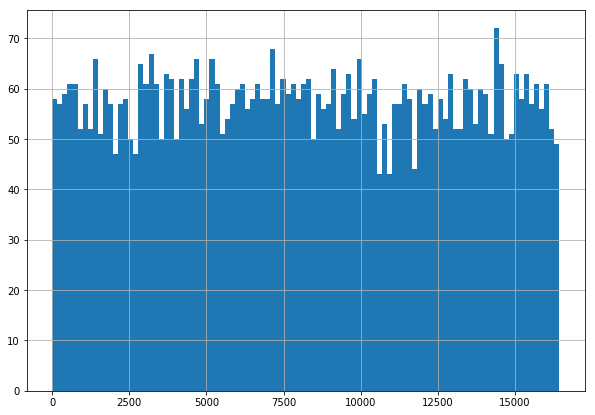

In [52]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

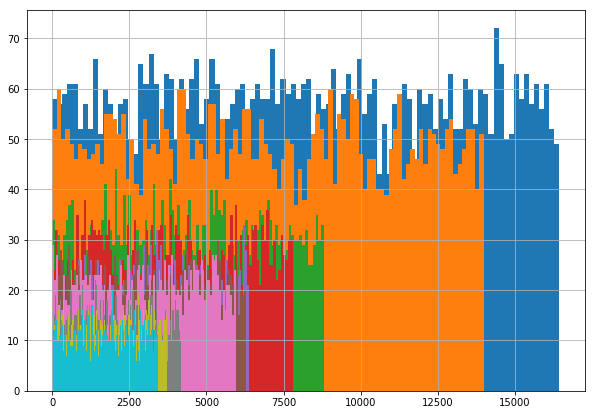

In [53]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

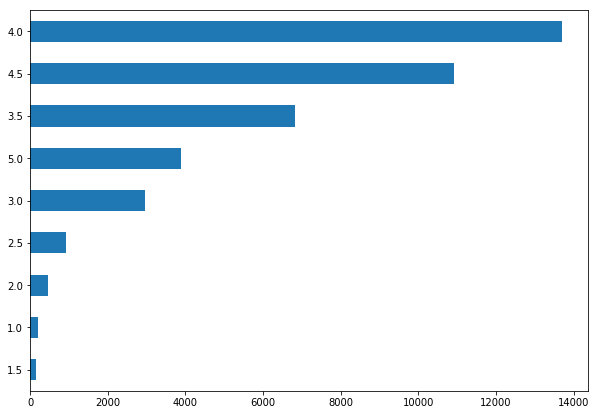

In [54]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

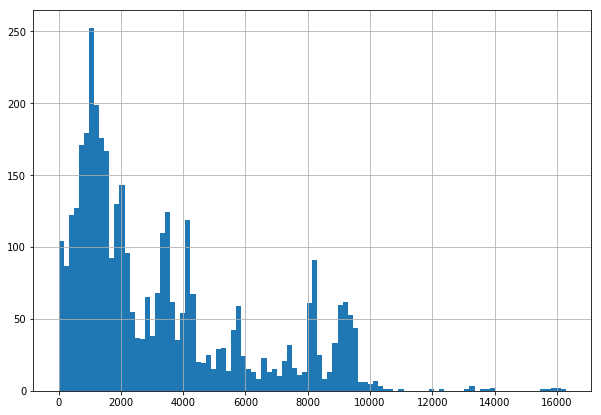

In [55]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

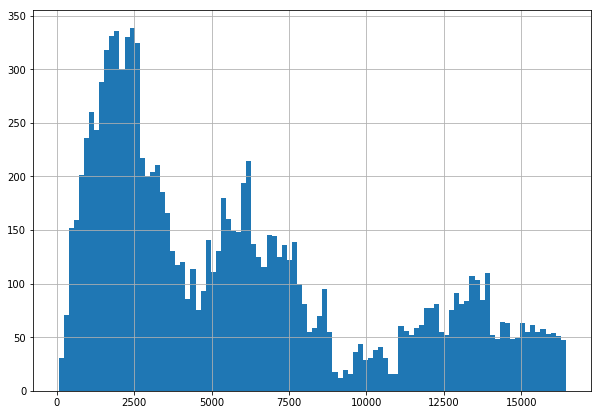

In [56]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

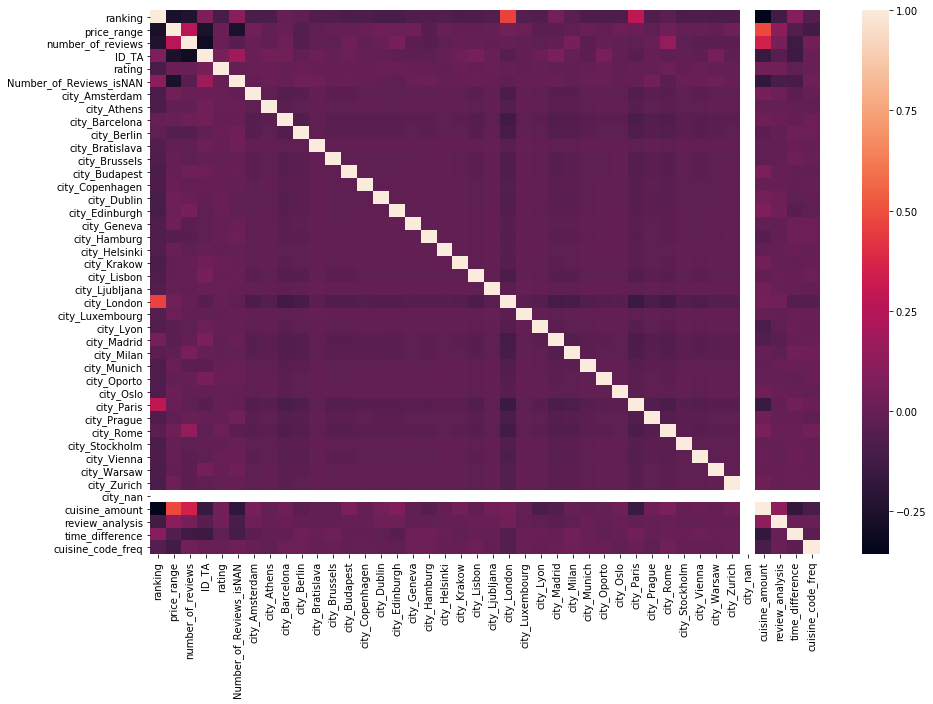

In [57]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [58]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [59]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [60]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
9238,7595.0,2.0,0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21717,1697.0,6.0,1,3.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42355,3940.0,67.0,1,4.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5454,8018.0,14.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22116,5586.0,17.0,1,5.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
42086,1445.0,342.0,1,4.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6445,6840.0,13.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35115,391.0,78.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10950,4290.0,73.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9025,1864.0,7.0,0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
Ranking              50000 non-null float64
Number of Reviews    50000 non-null float64
sample               50000 non-null int64
Rating               50000 non-null float64
City_Amsterdam       50000 non-null uint8
City_Athens          50000 non-null uint8
City_Barcelona       50000 non-null uint8
City_Berlin          50000 non-null uint8
City_Bratislava      50000 non-null uint8
City_Brussels        50000 non-null uint8
City_Budapest        50000 non-null uint8
City_Copenhagen      50000 non-null uint8
City_Dublin          50000 non-null uint8
City_Edinburgh       50000 non-null uint8
City_Geneva          50000 non-null uint8
City_Hamburg         50000 non-null uint8
City_Helsinki        50000 non-null uint8
City_Krakow          50000 non-null uint8
City_Lisbon          50000 non-null uint8
City_Ljubljana       50000 non-null uint8
City_London          50000 non-null uint8
Cit

In [62]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [63]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [64]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 35), (40000, 35), (40000, 34), (32000, 34), (8000, 34))

# Model 
Сам ML

In [65]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [66]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [67]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [68]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21240125


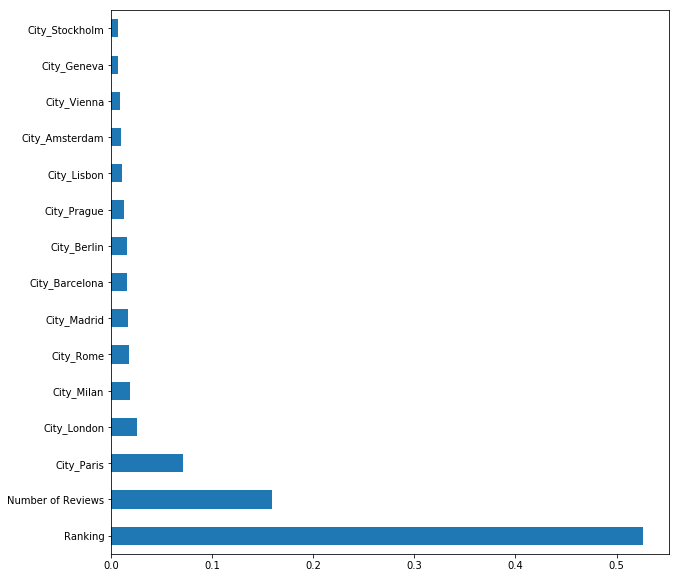

In [69]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [70]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
2588,169.0,113.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2367,15871.0,19.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5862,1733.0,305.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7812,4691.0,11.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6958,3195.0,10.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6678,6279.0,18.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6529,27.0,383.0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4279,5000.0,8.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5328,310.0,640.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1441,3046.0,76.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
test_data = test_data.drop(['Rating'], axis=1)

In [72]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [73]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [74]:
predict_submission

array([3.005, 4.295, 4.56 , ..., 3.   , 4.5  , 4.32 ])

In [75]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.005
1,id_1,4.295
2,id_2,4.560
3,id_3,4.155
4,id_4,4.485
5,id_5,4.580
6,id_6,1.475
7,id_7,3.220
8,id_8,4.100
9,id_9,4.750


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
